<a href="https://colab.research.google.com/github/o-joe-v/World-Population/blob/main/Master_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
import pandas as pd

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
from seaborn._core.properties import Color

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"Matplotlib {mpl.__version__}" )
print( f"Seaborn {sns.__version__}" )

Python 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
Pandas 1.4.4
NumPy 1.22.4
Matplotlib 3.7.1
Seaborn 0.12.2


# 1. การนำเข้าข้อมูล

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#ข้อมูล Total Population
Tpop = pd.read_csv('/content/Population.total.csv')
#ข้อมูล Male Population
Mpop = pd.read_csv('/content/Population.male.csv')
#ข้อมูล Female Population
Fpop = pd.read_csv('/content/Population.female.csv')
#ข้อมูล Birth Rate
Brate = pd.read_csv('/content/Birth.rate.csv')
#ข้อมูล Death Rate
Drate = pd.read_csv('/content/Death.rate.csv')
#ข้อมูล Land Area
Land = pd.read_csv('/content/Land.area.csv')
#ข้อมูล Life Expectancy
Life = pd.read_csv('/content/Life.expectancy.csv')
#ข้อมูล Country Region
Ccode = pd.read_csv('/content/country.csv')

# 2. Data Cleaning and Preparation.

In [4]:
# นำ Total Population มากลับตาราง
year_list = list(Tpop.iloc[:, 4:].columns)
df = pd.melt(Tpop,['Country Name','Country Code','Indicator Name'],value_vars=year_list,value_name='population')
df.rename({'variable': 'Year'}, axis=1, inplace=True)

In [5]:
# เพิ่มคำอธิบาย region
df=pd.merge(df,Ccode,left_on='Country Name',right_on='Country Name',how='left')
df.rename({'Country Code_x': 'Country Code'}, axis=1, inplace=True)
df=df.drop(columns=['Country Code_y'])

In [6]:
# Male Population 
year_list = list(Mpop.iloc[:, 4:].columns)
Mpop1 = pd.melt(Mpop,['Country Name','Country Code','Indicator Name'],value_vars=year_list,value_name='Male')
Mpop1.rename({'variable': 'Year'}, axis=1, inplace=True)
#ตัดมาเฉพาะ column Male มาต่อท้าย
Mpop2=Mpop1[['Male']]
df = pd.concat([df,Mpop2],ignore_index=False,axis=1)

In [7]:
# Female Population 
year_list = list(Fpop.iloc[:, 4:].columns)
Fpop1 = pd.melt(Fpop,['Country Name','Country Code','Indicator Name'],value_vars=year_list,value_name='Female')
Fpop1.rename({'variable': 'Year'}, axis=1, inplace=True)
#ตัดมาเฉพาะ column Female มาต่อท้าย
Fpop2=Fpop1[['Female']]
df = pd.concat([df,Fpop2],ignore_index=False,axis=1)

In [8]:
# Birth Rate 
year_list = list(Brate.iloc[:, 4:].columns)
Brate1 = pd.melt(Brate,['Country Name','Country Code','Indicator Name'],value_vars=year_list,value_name='Birth Rate')
Brate1.rename({'variable': 'Year'}, axis=1, inplace=True)
#ตัดมาเฉพาะ column Birth Rate มาต่อท้าย
Brate2=Brate1[['Birth Rate']]
df = pd.concat([df,Brate2],ignore_index=False,axis=1)

In [9]:
# Death Rate 
year_list = list(Drate.iloc[:, 4:].columns)
Drate1 = pd.melt(Drate,['Country Name','Country Code','Indicator Name'],value_vars=year_list,value_name='Death Rate')
Drate1.rename({'variable': 'Year'}, axis=1, inplace=True)
#ตัดมาเฉพาะ column Death Rate มาต่อท้าย
Drate2=Drate1[['Death Rate']]
df = pd.concat([df,Drate2],ignore_index=False,axis=1)

In [10]:
# Land area  
year_list = list(Land.iloc[:, 4:].columns)
Land1 = pd.melt(Land,['Country Name','Country Code','Indicator Name'],value_vars=year_list,value_name='Land')
Land1.rename({'variable': 'Year'}, axis=1, inplace=True)
#ตัดมาเฉพาะ column Land มาต่อท้าย
Land2=Land1[['Land']]
df = pd.concat([df,Land2],ignore_index=False,axis=1)

In [11]:
# Life expectancy 
year_list = list(Life.iloc[:, 4:].columns)
Life1 = pd.melt(Life,['Country Name','Country Code','Indicator Name'],value_vars=year_list,value_name='Life')
Life1.rename({'variable': 'Year'}, axis=1, inplace=True)
#ตัดมาเฉพาะ column Land มาต่อท้าย
Life2=Life1[['Life']]
df = pd.concat([df,Life2],ignore_index=False,axis=1)

In [12]:
# เรียง column
from pandas.core.internals.array_manager import new_block
df[df.isna().any(axis=1)]
new_cols =["Region","Continent","Country Code","Country Name","Indicator Name","Year","population","Male","Female","Birth Rate","Death Rate","Land","Life"]
df=df.reindex(columns=new_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16492 entries, 0 to 16491
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          13330 non-null  object 
 1   Continent       13330 non-null  object 
 2   Country Code    16492 non-null  object 
 3   Country Name    16492 non-null  object 
 4   Indicator Name  16492 non-null  object 
 5   Year            16492 non-null  object 
 6   population      16400 non-null  float64
 7   Male            16400 non-null  float64
 8   Female          16400 non-null  float64
 9   Birth Rate      15458 non-null  float64
 10  Death Rate      15434 non-null  float64
 11  Land            15608 non-null  float64
 12  Life            15204 non-null  float64
dtypes: float64(7), object(6)
memory usage: 1.8+ MB


In [13]:
#สำรวจค่า Nan
df.isna().sum()

Region            3162
Continent         3162
Country Code         0
Country Name         0
Indicator Name       0
Year                 0
population          92
Male                92
Female              92
Birth Rate        1034
Death Rate        1058
Land               884
Life              1288
dtype: int64

In [14]:
#จัดการค่า Nan เริ่มจาก Region และ Continent เพราะ ค่า Nan มากที่สุด และพบว่าไม่ใช่ชื่อประเทศจึง Drop ทิ้ง
Na_reg = df.loc[df['Region'].isna(),:]
df = df.drop(Na_reg.index,axis=0)
df

,Region,Continent,Country Code,Country Name,Indicator Name,Year,population,Male,Female,Birth Rate,Death Rate,Land,Life
0,Caribbean,North America,ABW,Aruba,"Population, total",1960,54608.0,26834.0,27773.0,33.883,6.594,NaN,64.152
2,Southern Asia,Asia,AFG,Afghanistan,"Population, total",1960,8622466.0,4476521.0,4145945.0,50.340,31.921,NaN,32.535
4,Middle Africa,Africa,AGO,Angola,"Population, total",1960,5357195.0,2686966.0,2670229.0,51.026,26.659,NaN,38.211
5,Southern Europe,Europe,ALB,Albania,"Population, total",1960,1608800.0,823752.0,785048.0,41.068,16.681,NaN,54.439
6,Southern Europe,Europe,AND,Andorra,"Population, total",1960,9443.0,4773.0,4670.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16486,Polynesia,Oceania,WSM,Samoa,"Population, total",2021,218764.0,111550.0,107213.0,NaN,NaN,NaN,NaN
16488,Western Asia,Asia,YEM,"Yemen, Rep.","Population, total",2021,32981641.0,16668432.0,16313210.0,NaN,NaN,NaN,NaN
16489,Southern Africa,Africa,ZAF,South Africa,"Population, total",2021,59392255.0,28894608.0,30497646.0,NaN,NaN,NaN,NaN
16490,Eastern Africa,Africa,ZMB,Zambia,"Population, total",2021,19473125.0,9609004.0,9864121.0,NaN,NaN,NaN,NaN


In [15]:
# drop ข้อมูลปี 2021 ออกเนื่องจากมีค่า Nan หลาย columns 
yy = df.loc[df['Year']=='2021']
df = df.drop(yy.index)

In [16]:
#จัดการ Nan ใน columns 'Population','Male','Female','Birth Rate','Death Rate','Land','Life' 
df['population'].fillna(df.groupby('Country Code')['population'].transform('median'), inplace = True)
df['Male'].fillna(df.groupby('Country Code')['Male'].transform('median'), inplace = True)
df['Female'].fillna(df.groupby('Country Code')['Female'].transform('median'), inplace = True)
df['Birth Rate'].fillna(df.groupby('Country Code')['Birth Rate'].transform('median'), inplace = True)
df['Death Rate'].fillna(df.groupby('Country Code')['Death Rate'].transform('median'), inplace = True)
df['Land'].fillna(df.groupby('Country Code')['Land'].transform('median'), inplace = True)
df['Life'].fillna(df.groupby('Country Code')['Life'].transform('median'), inplace = True)
df

,Region,Continent,Country Code,Country Name,Indicator Name,Year,population,Male,Female,Birth Rate,Death Rate,Land,Life
0,Caribbean,North America,ABW,Aruba,"Population, total",1960,54608.0,26834.0,27773.0,33.883,6.594,180.0,64.152
2,Southern Asia,Asia,AFG,Afghanistan,"Population, total",1960,8622466.0,4476521.0,4145945.0,50.340,31.921,652230.0,32.535
4,Middle Africa,Africa,AGO,Angola,"Population, total",1960,5357195.0,2686966.0,2670229.0,51.026,26.659,1246700.0,38.211
5,Southern Europe,Europe,ALB,Albania,"Population, total",1960,1608800.0,823752.0,785048.0,41.068,16.681,27400.0,54.439
6,Southern Europe,Europe,AND,Andorra,"Population, total",1960,9443.0,4773.0,4670.0,11.000,3.600,470.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16220,Polynesia,Oceania,WSM,Samoa,"Population, total",2020,214929.0,109634.0,105296.0,27.622,5.305,2780.0,72.768
16222,Western Asia,Asia,YEM,"Yemen, Rep.","Population, total",2020,32284046.0,16320979.0,15963067.0,31.252,6.509,527970.0,64.650
16223,Southern Africa,Africa,ZAF,South Africa,"Population, total",2020,58801927.0,28580784.0,30221143.0,20.326,9.425,1213090.0,65.252
16224,Eastern Africa,Africa,ZMB,Zambia,"Population, total",2020,18927715.0,9338613.0,9589102.0,34.953,6.602,743390.0,62.380


In [17]:
# พบว่ายังมีค่า Nan อยู่จึง drop ทิ้งทั้ง row
df.loc[df['Life'].isna(),:]
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12749 entries, 0 to 16225
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          12749 non-null  object 
 1   Continent       12749 non-null  object 
 2   Country Code    12749 non-null  object 
 3   Country Name    12749 non-null  object 
 4   Indicator Name  12749 non-null  object 
 5   Year            12749 non-null  object 
 6   population      12749 non-null  float64
 7   Male            12749 non-null  float64
 8   Female          12749 non-null  float64
 9   Birth Rate      12749 non-null  float64
 10  Death Rate      12749 non-null  float64
 11  Land            12749 non-null  float64
 12  Life            12749 non-null  float64
dtypes: float64(7), object(6)
memory usage: 1.4+ MB


# 3. Exploratory data

##3.1 Population

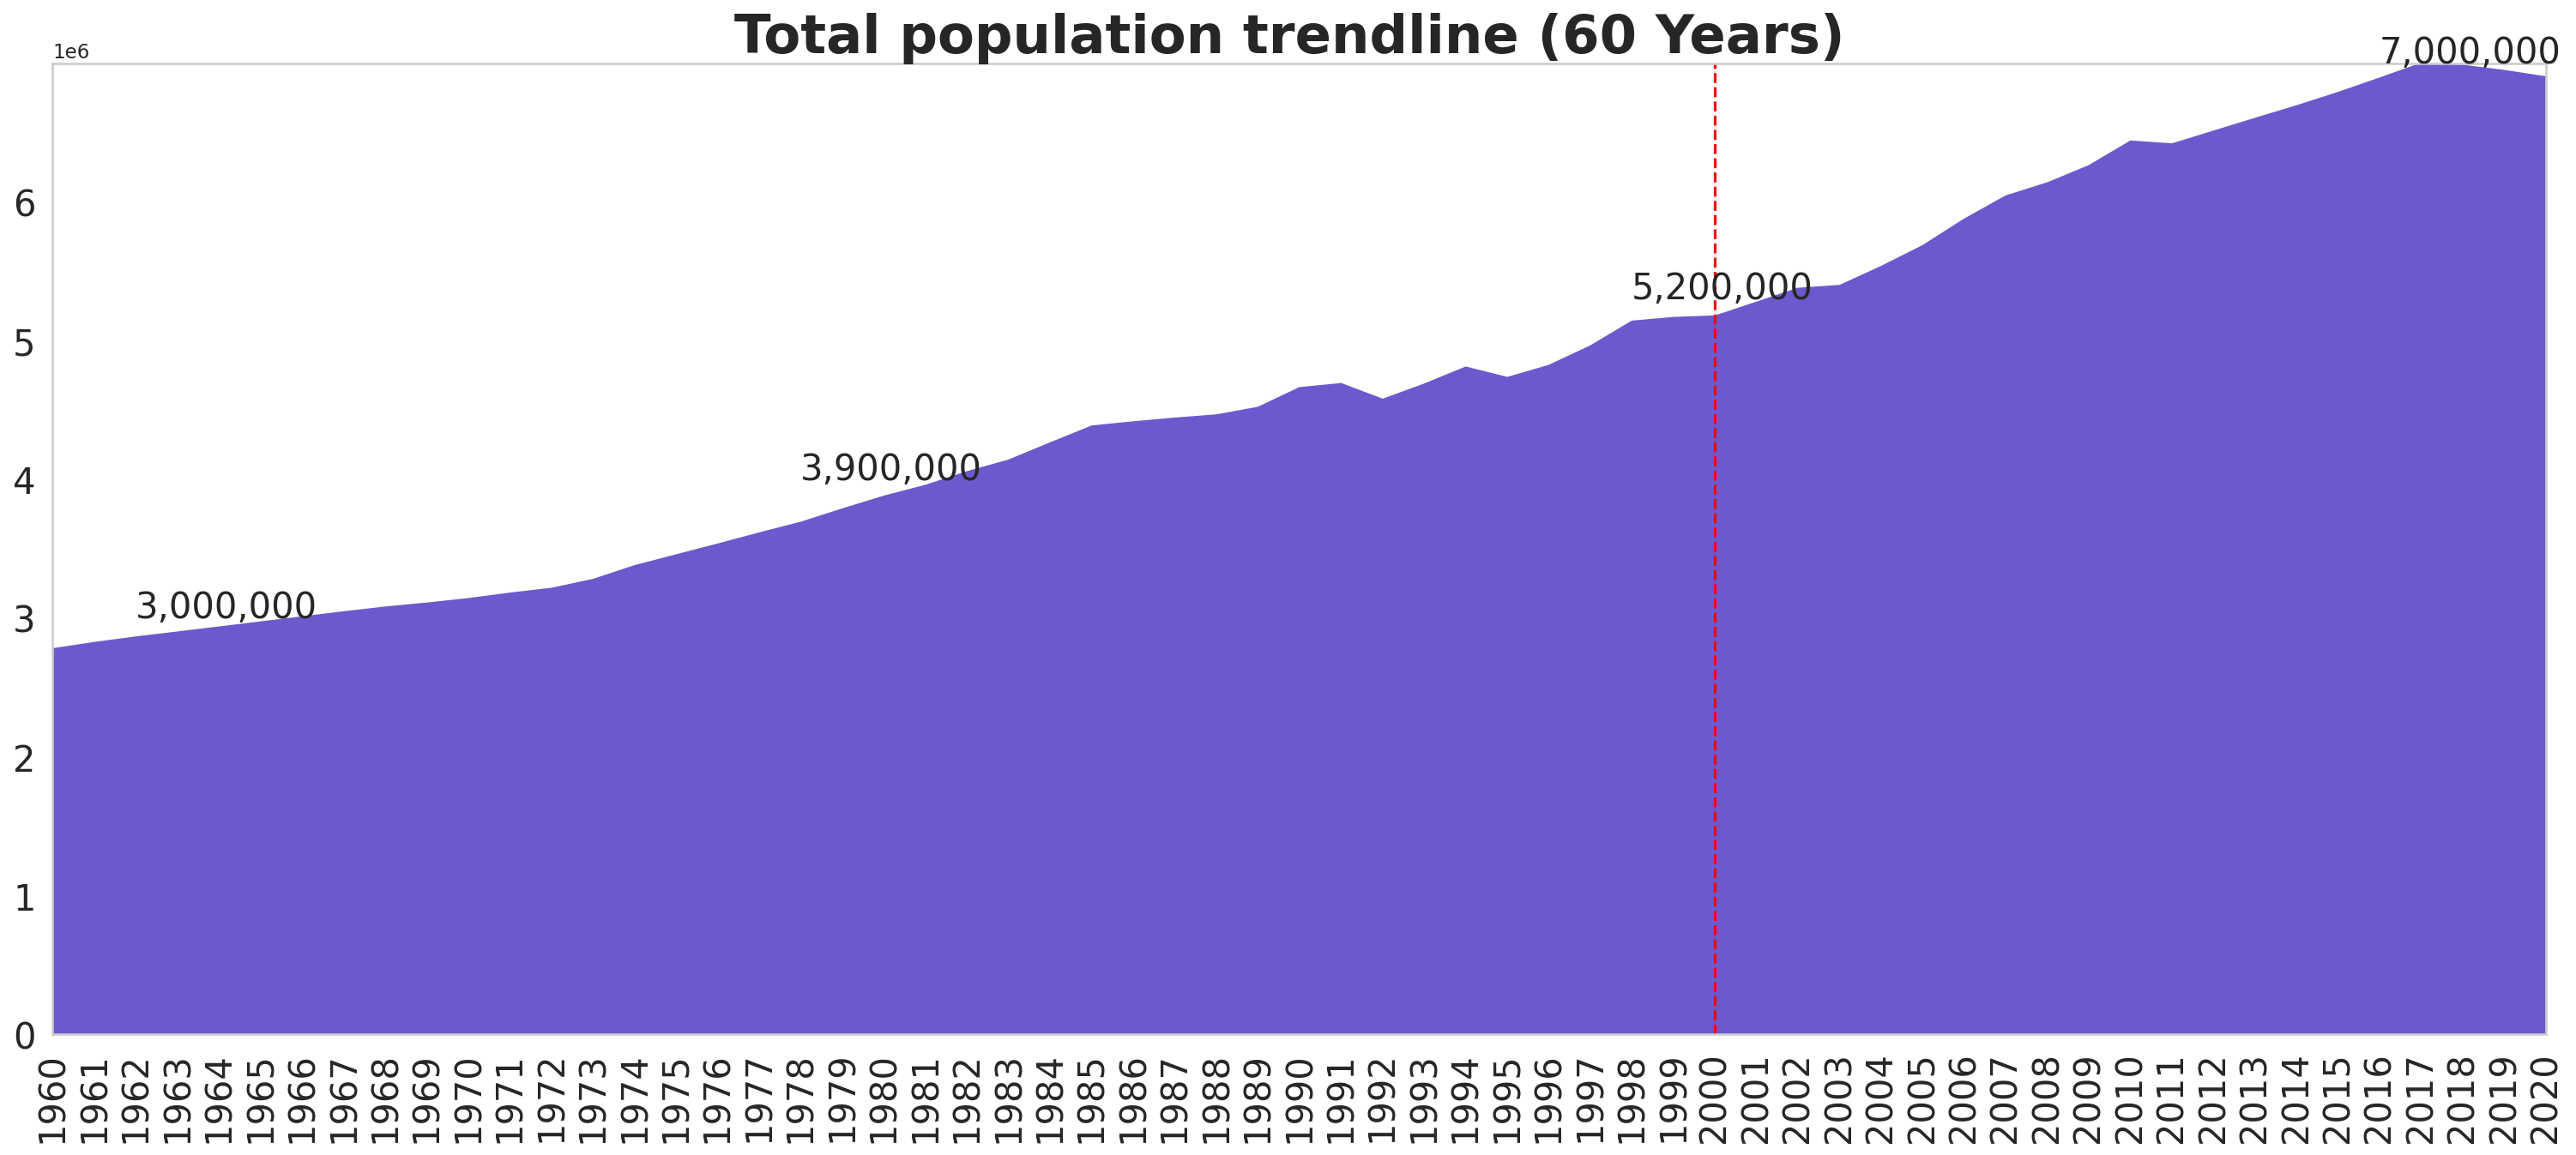

In [36]:
# ภาพรวม Population
totalp = df.pivot_table(index='Year',columns=None,values=['population'],aggfunc=['median'])
type(totalp)
fig, ax = plt.subplots(figsize=(25,10),dpi=150)
c=palette=sns.color_palette("cubehelix")
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)

tyear = totalp.index
tpop =totalp.iloc[:,0] 
plt.fill_between(tyear,tpop,color='slateblue')
plt.title("Total population trendline (60 Years) ",fontsize = 30,fontweight="bold")
plt.margins(0,0) 

ax.annotate("3,000,000", xy=('1965', 3000000), xycoords='data', 
             xytext=('1962',3000000), textcoords='data',fontsize=20) 
ax.annotate("3,900,000", xy=('1980', 3900000), xycoords='data', 
             xytext=('1978',4000000), textcoords='data',fontsize=20)
ax.annotate("5,200,000", xy=('2000', 5300000), xycoords='data', 
             xytext=('1998',5300000), textcoords='data',fontsize=20)
ax.annotate("7,000,000", xy=('2016', 7000000), xycoords='data', 
             xytext=('2016',7000000), textcoords='data',fontsize=20)
ax.axvline(x='2000', linestyle='--',color='red')

plt.savefig("Total Pop.png",dpi=150)

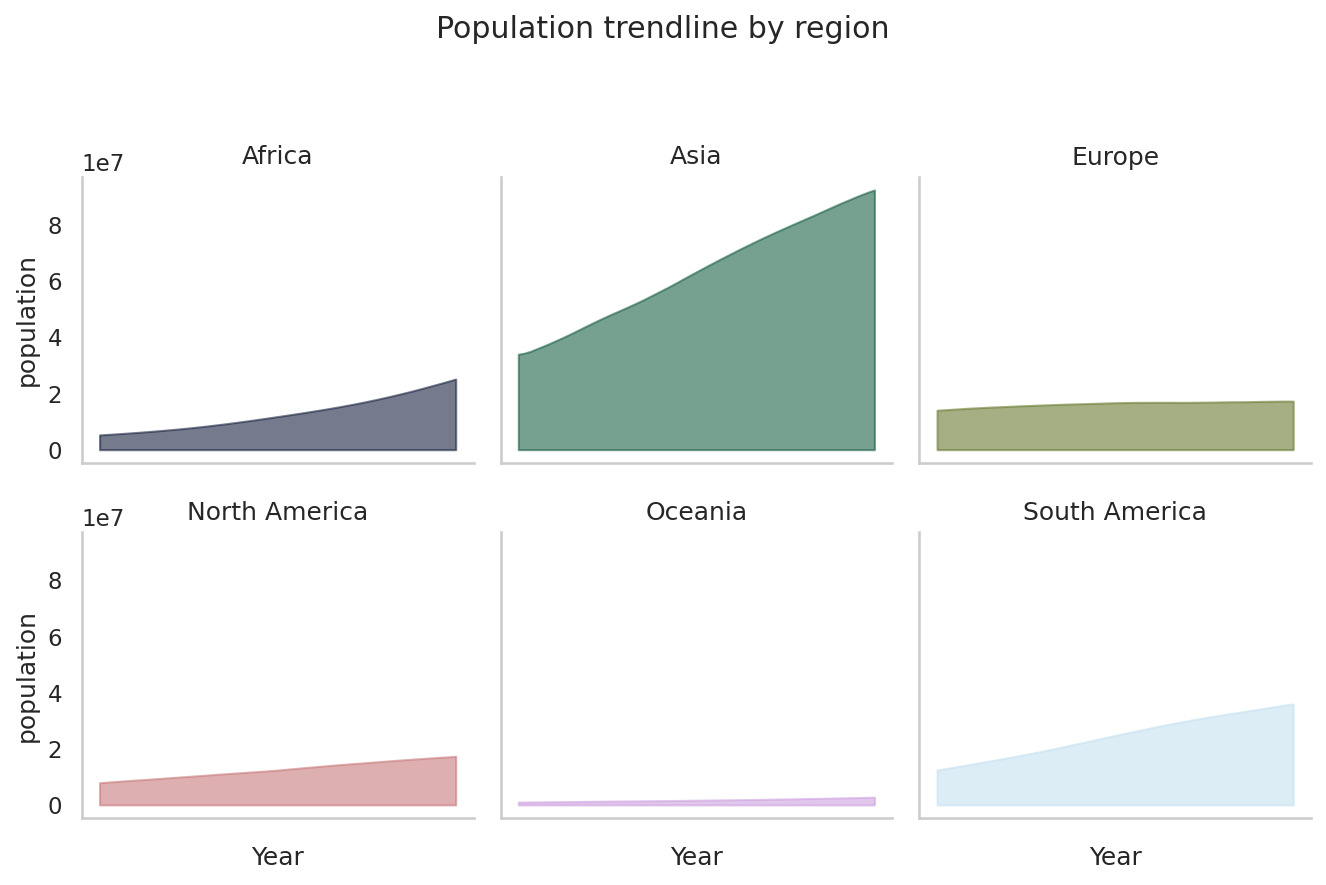

In [37]:
# Population by Region
b = df.pivot_table(index=['Year','Continent'],columns=None,values=['population'],aggfunc=['mean'])
type(b)

df2 = b.reset_index()
df2.columns = ['Year','Continent','population']

g = sns.FacetGrid(df2, col='Continent',hue='Continent',col_wrap=3,palette=sns.color_palette("cubehelix"))
g.set(xticklabels=[])
g.tick_params(bottom=False)

g = g.map(plt.fill_between, 'Year', 'population',alpha=0.6).set_titles("{col_name} Continent")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.80)
g = g.fig.suptitle('Population trendline by region')
sns.set_style("whitegrid", {'axes.grid' : False})

plt.savefig("Total Pop by region.png",dpi=150)

##3.2 Birth Rate

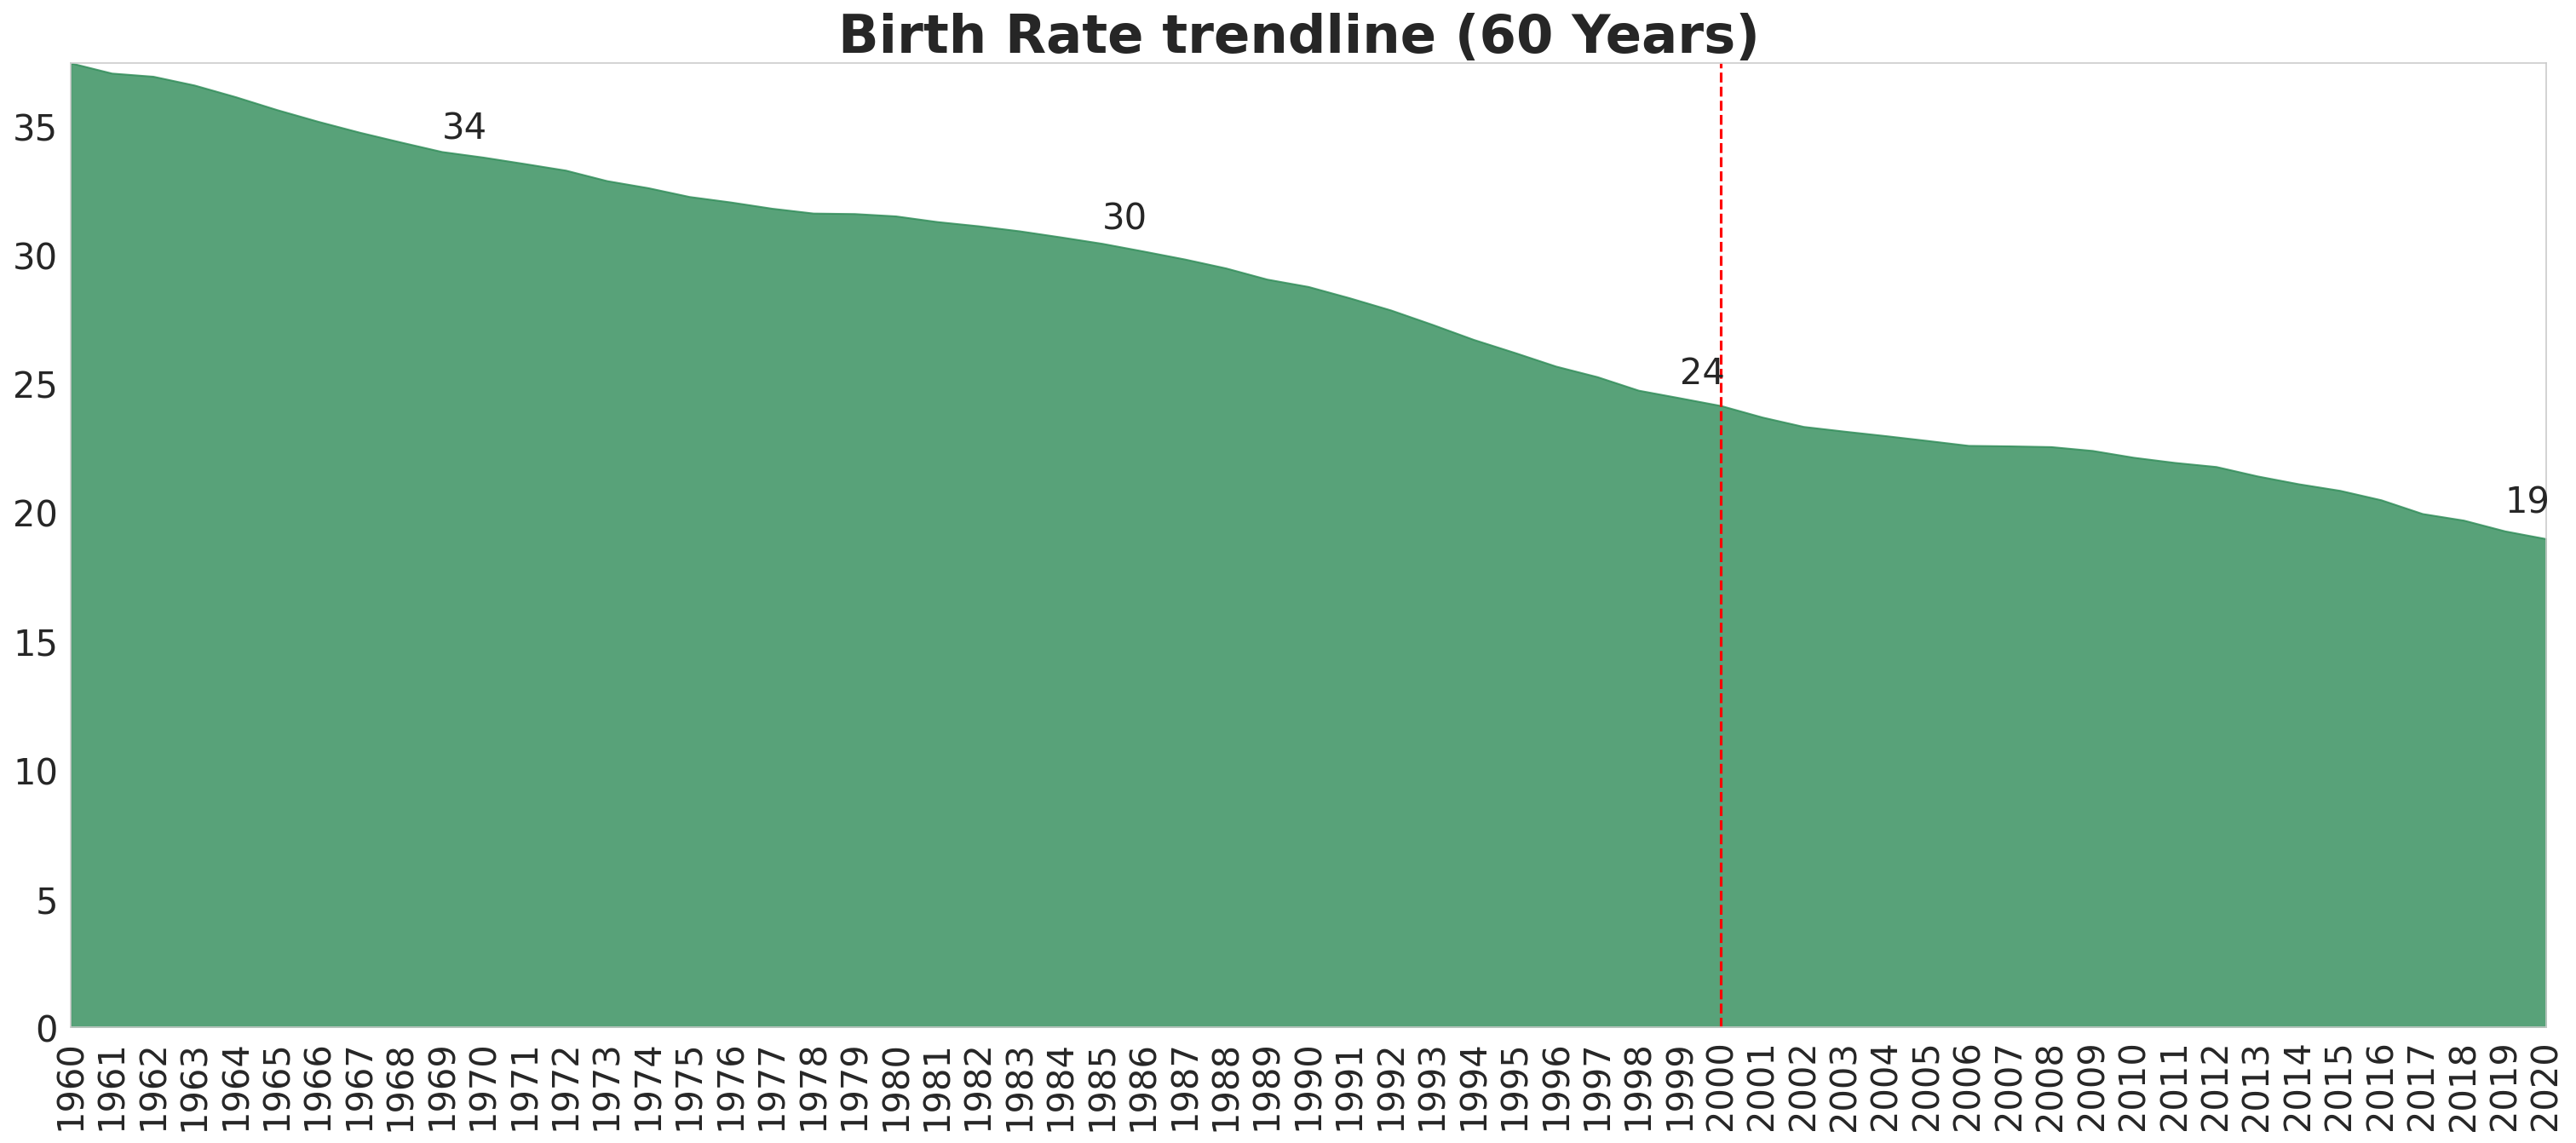

In [20]:
# ภาพรวม Birth Rate
btotal = df.pivot_table(index='Year',columns=None,values=['Birth Rate'],aggfunc=['mean'])
type(btotal)
fig, ax = plt.subplots(figsize=(25,10),dpi=150)
c=palette=sns.color_palette("cubehelix")
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)

tyear = btotal.index
btotal =btotal.iloc[:,0] 
plt.fill_between(tyear,btotal,color='seagreen',alpha=0.8)
plt.title("Birth Rate trendline (60 Years) ",fontsize = 30,fontweight="bold")
plt.margins(0,0)

ax.annotate("34", xy=('1970', 37), xycoords='data', 
             xytext=('1969',34.5), textcoords='data',fontsize=20) 
ax.annotate("30", xy=('1986', 31), xycoords='data', 
             xytext=('1985',31), textcoords='data',fontsize=20)
ax.annotate("24", xy=('2000', 22), xycoords='data', 
             xytext=('1999',25), textcoords='data',fontsize=20)
ax.annotate("19",  xy=('2020', 17), xycoords='data', 
             xytext=('2019',20), textcoords='data',fontsize=20)
ax.axvline(x='2000', linestyle='--',color='red')

plt.savefig("Birth Rate.png",dpi=150)

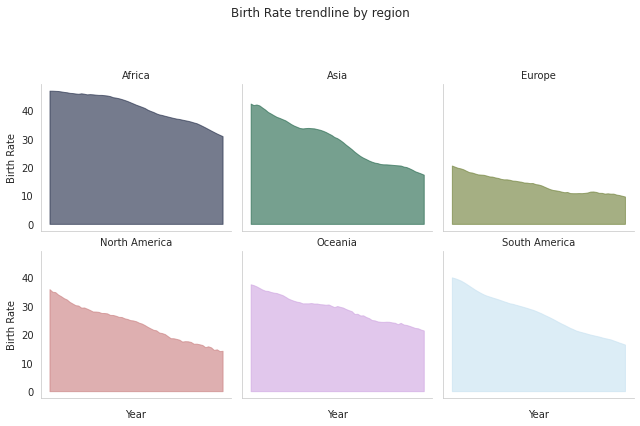

In [21]:
# Birth Rate by Region
b = df.pivot_table(index=['Year','Continent'],columns=None,values=['Birth Rate'],aggfunc=['mean'])
type(b)

df2 = b.reset_index()
df2.columns = ['Year','Continent','Birth Rate']

g = sns.FacetGrid(df2, col='Continent',hue='Continent',col_wrap=3,palette=sns.color_palette("cubehelix"))
g.set(xticklabels=[])
g.tick_params(bottom=False)

g = g.map(plt.fill_between, 'Year', 'Birth Rate',alpha=0.6).set_titles("{col_name} Continent")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.80)
g = g.fig.suptitle('Birth Rate trendline by region')
sns.set_style("whitegrid", {'axes.grid' : False})

plt.savefig("Birth Rate by Region.png",dpi=150)

##3.3 Death Rate

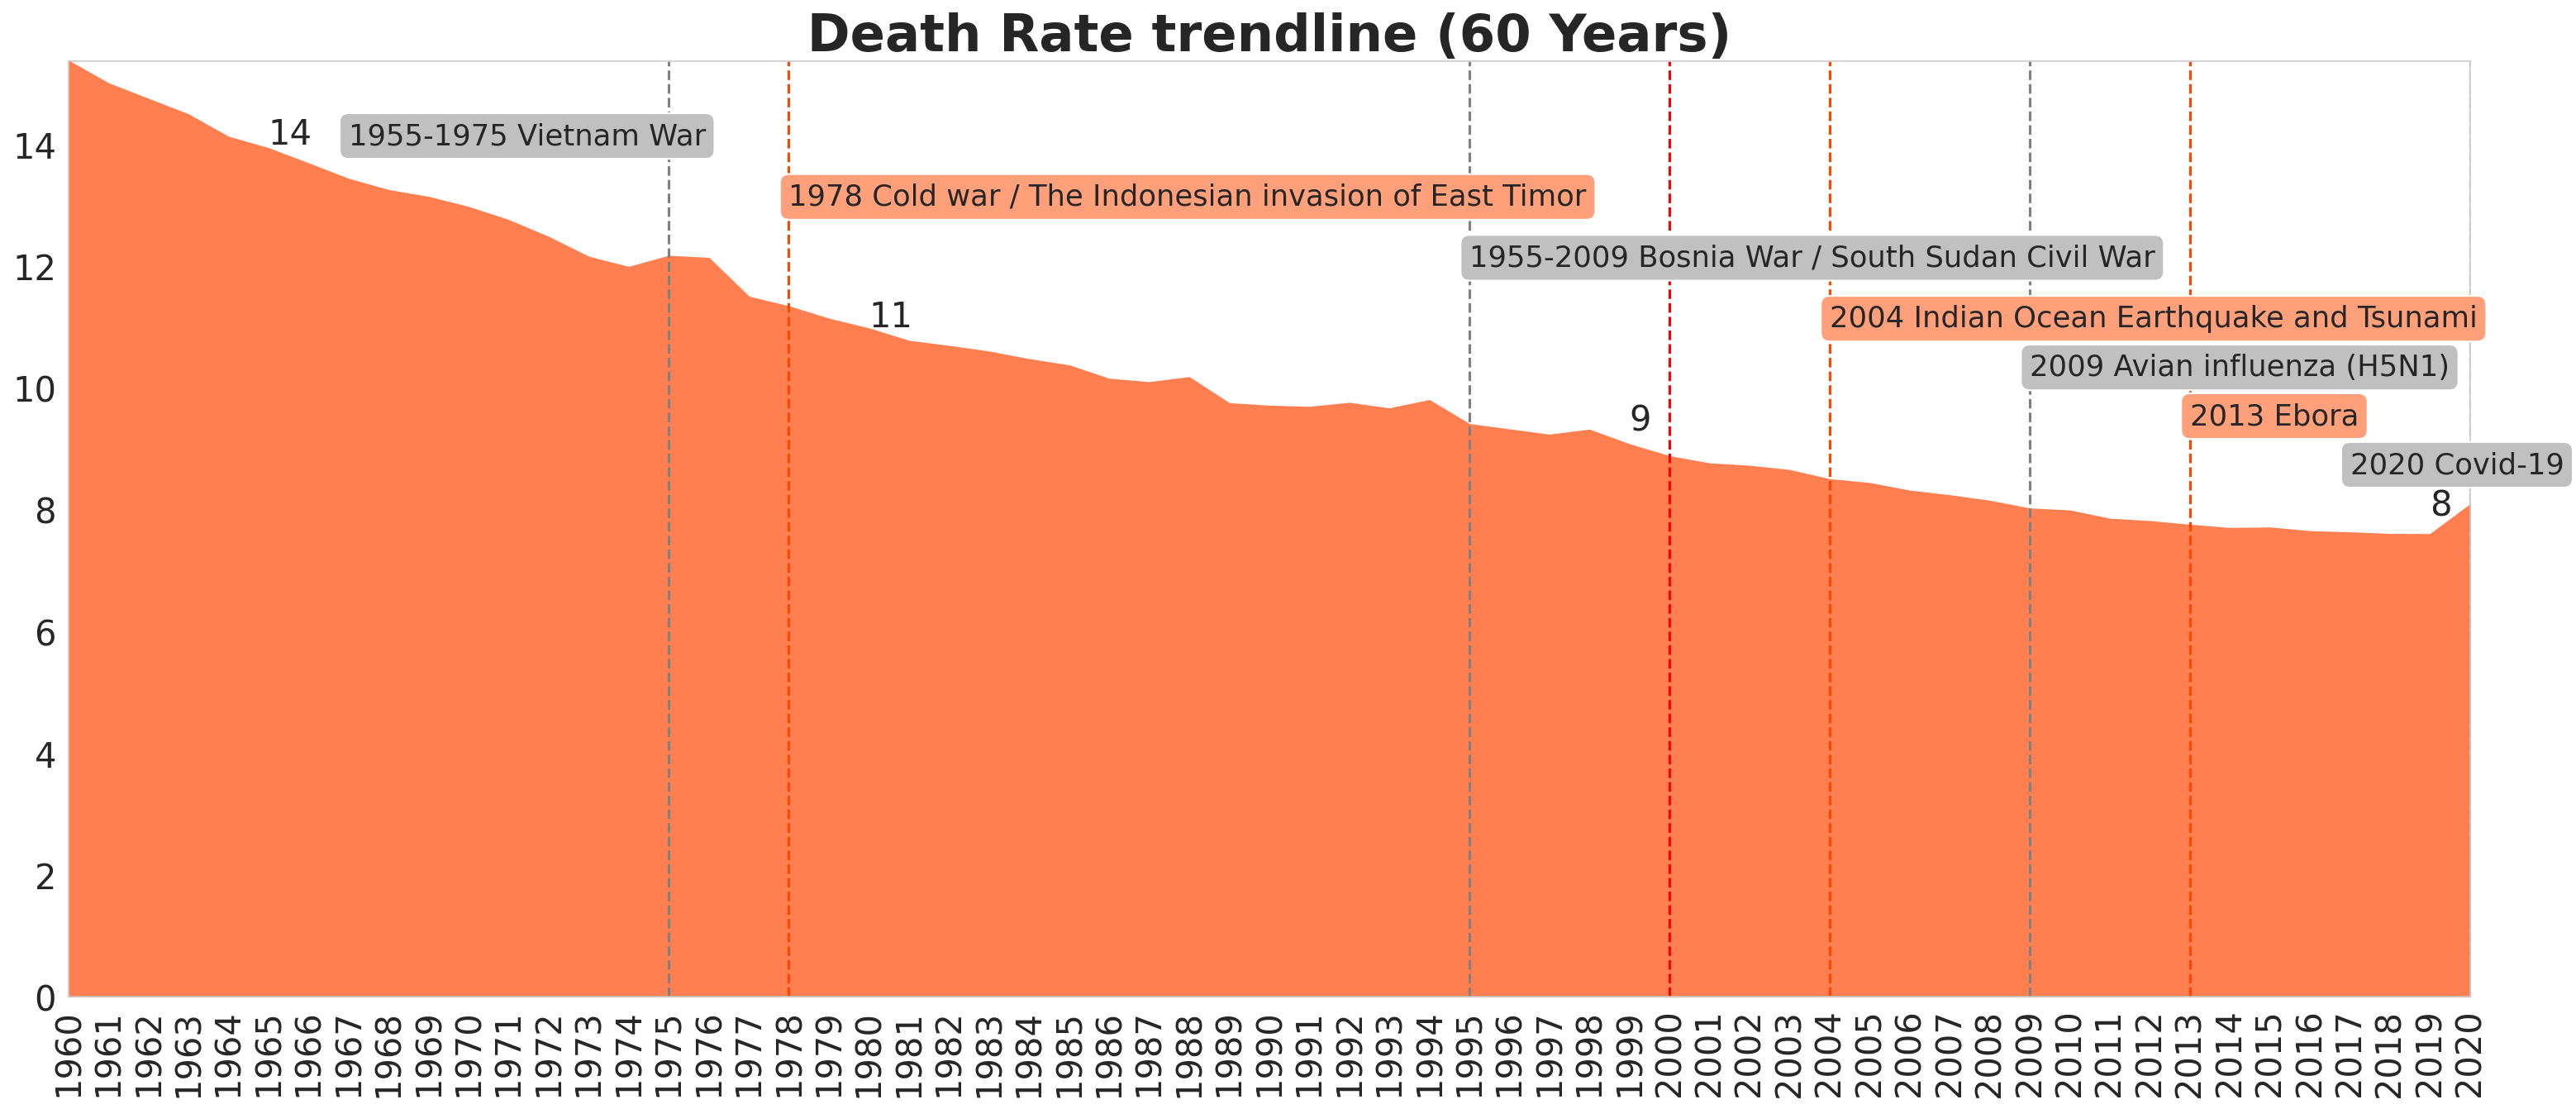

In [22]:
# ภาพรวม Death Rate
totalp = df.pivot_table(index='Year',columns=None,values=['Death Rate'],aggfunc=['mean'])
type(totalp)
fig, ax = plt.subplots(figsize=(25,10),dpi=150)
c=palette=sns.color_palette("cubehelix")
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)

tyear = totalp.index
tpop =totalp.iloc[:,0] 
plt.fill_between(tyear,tpop,color='coral')
plt.title(" Death Rate trendline (60 Years) ",fontsize = 30,fontweight="bold")
plt.margins(0,0)

ax.annotate("14",  xy=('1965', 11), xycoords='data', 
             xytext=('1965',14), textcoords='data',fontsize=20)
ax.annotate("11", xy=('1980', 10), xycoords='data', 
             xytext=('1980',11), textcoords='data',fontsize=20)
ax.annotate("9", xy=('2000', 8), xycoords='data', 
             xytext=('1999',9.3), textcoords='data',fontsize=20)
ax.annotate("8", xy=('2020', 7), xycoords='data', 
             xytext=('2019',7.9), textcoords='data',fontsize=20)
ax.axvline(x='2000', linestyle='--',color='red')

#สร้าง Events
ax.annotate("1955-1975 Vietnam War",  xy=('1970', 11), xycoords='data', 
             xytext=('1967',14), textcoords='data',
             bbox=dict(boxstyle='round',fc='silver'),fontsize=17)
ax.axvline(x='1975', linestyle='--',color='grey')

ax.annotate("1978 Cold war / The Indonesian invasion of East Timor",  xy=('1978', 10), xycoords='data', 
             xytext=('1978',13), textcoords='data',
             bbox=dict(boxstyle='round',fc='lightsalmon'),fontsize=17)
ax.axvline(x='1978', linestyle='--',color='orangered')

ax.annotate("1955-2009 Bosnia War / South Sudan Civil War",  xy=('1995', 9), xycoords='data', 
             xytext=('1995',12), textcoords='data',
             bbox=dict(boxstyle='round',fc='silver'),fontsize=17)
ax.axvline(x='1995', linestyle='--',color='grey')

ax.annotate("2004 Indian Ocean Earthquake and Tsunami",  xy=('2004', 9), xycoords='data', 
             xytext=('2004',11), textcoords='data',
             bbox=dict(boxstyle='round',fc='lightsalmon'),fontsize=17)
ax.axvline(x='2004', linestyle='--',color='orangered')

ax.annotate("2009 Avian influenza (H5N1)",  xy=('2009', 9), xycoords='data', 
             xytext=('2009',10.2), textcoords='data',
             bbox=dict(boxstyle='round',fc='silver'),fontsize=17)
ax.axvline(x='2009', linestyle='--',color='grey')

ax.annotate("2013 Ebora",  xy=('2013', 9), xycoords='data', 
             xytext=('2013',9.4), textcoords='data',
             bbox=dict(boxstyle='round',fc='lightsalmon'),fontsize=17)
ax.axvline(x='2013', linestyle='--',color='orangered')

ax.annotate("2020 Covid-19",  xy=('2017', 9), xycoords='data', 
             xytext=('2017',8.6), textcoords='data',
             bbox=dict(boxstyle='round',fc='silver'),fontsize=17)
ax.axvline(x='2020', linestyle='--',color='grey')

plt.savefig("Death Rate.png",dpi=150)

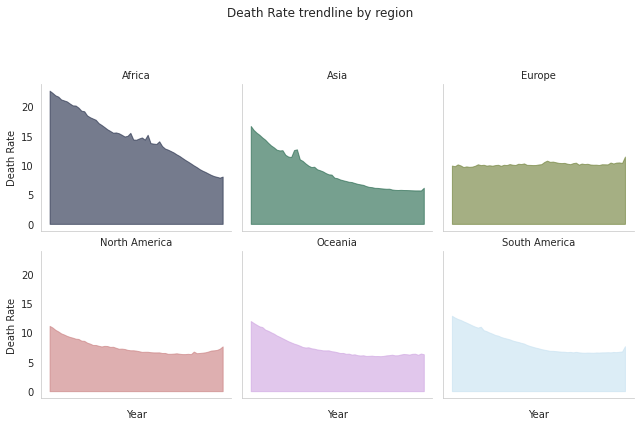

In [23]:
# Death Rate by Region
b = df.pivot_table(index=['Year','Continent'],columns=None,values=['Death Rate'],aggfunc=['mean'])
type(b)

df2 = b.reset_index()
df2.columns = ['Year','Continent','Death Rate']

g = sns.FacetGrid(df2, col='Continent',hue='Continent',col_wrap=3,palette=sns.color_palette("cubehelix"))
g.set(xticklabels=[])
g.tick_params(bottom=False)

g = g.map(plt.fill_between, 'Year', 'Death Rate',alpha=0.6).set_titles("{col_name} Continent")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.80)
g = g.fig.suptitle('Death Rate trendline by region')
sns.set_style("whitegrid", {'axes.grid' : False})

plt.savefig("Death Rate by region.png",dpi=150)

##3.4 Birth Rate and Death Rate Ratio

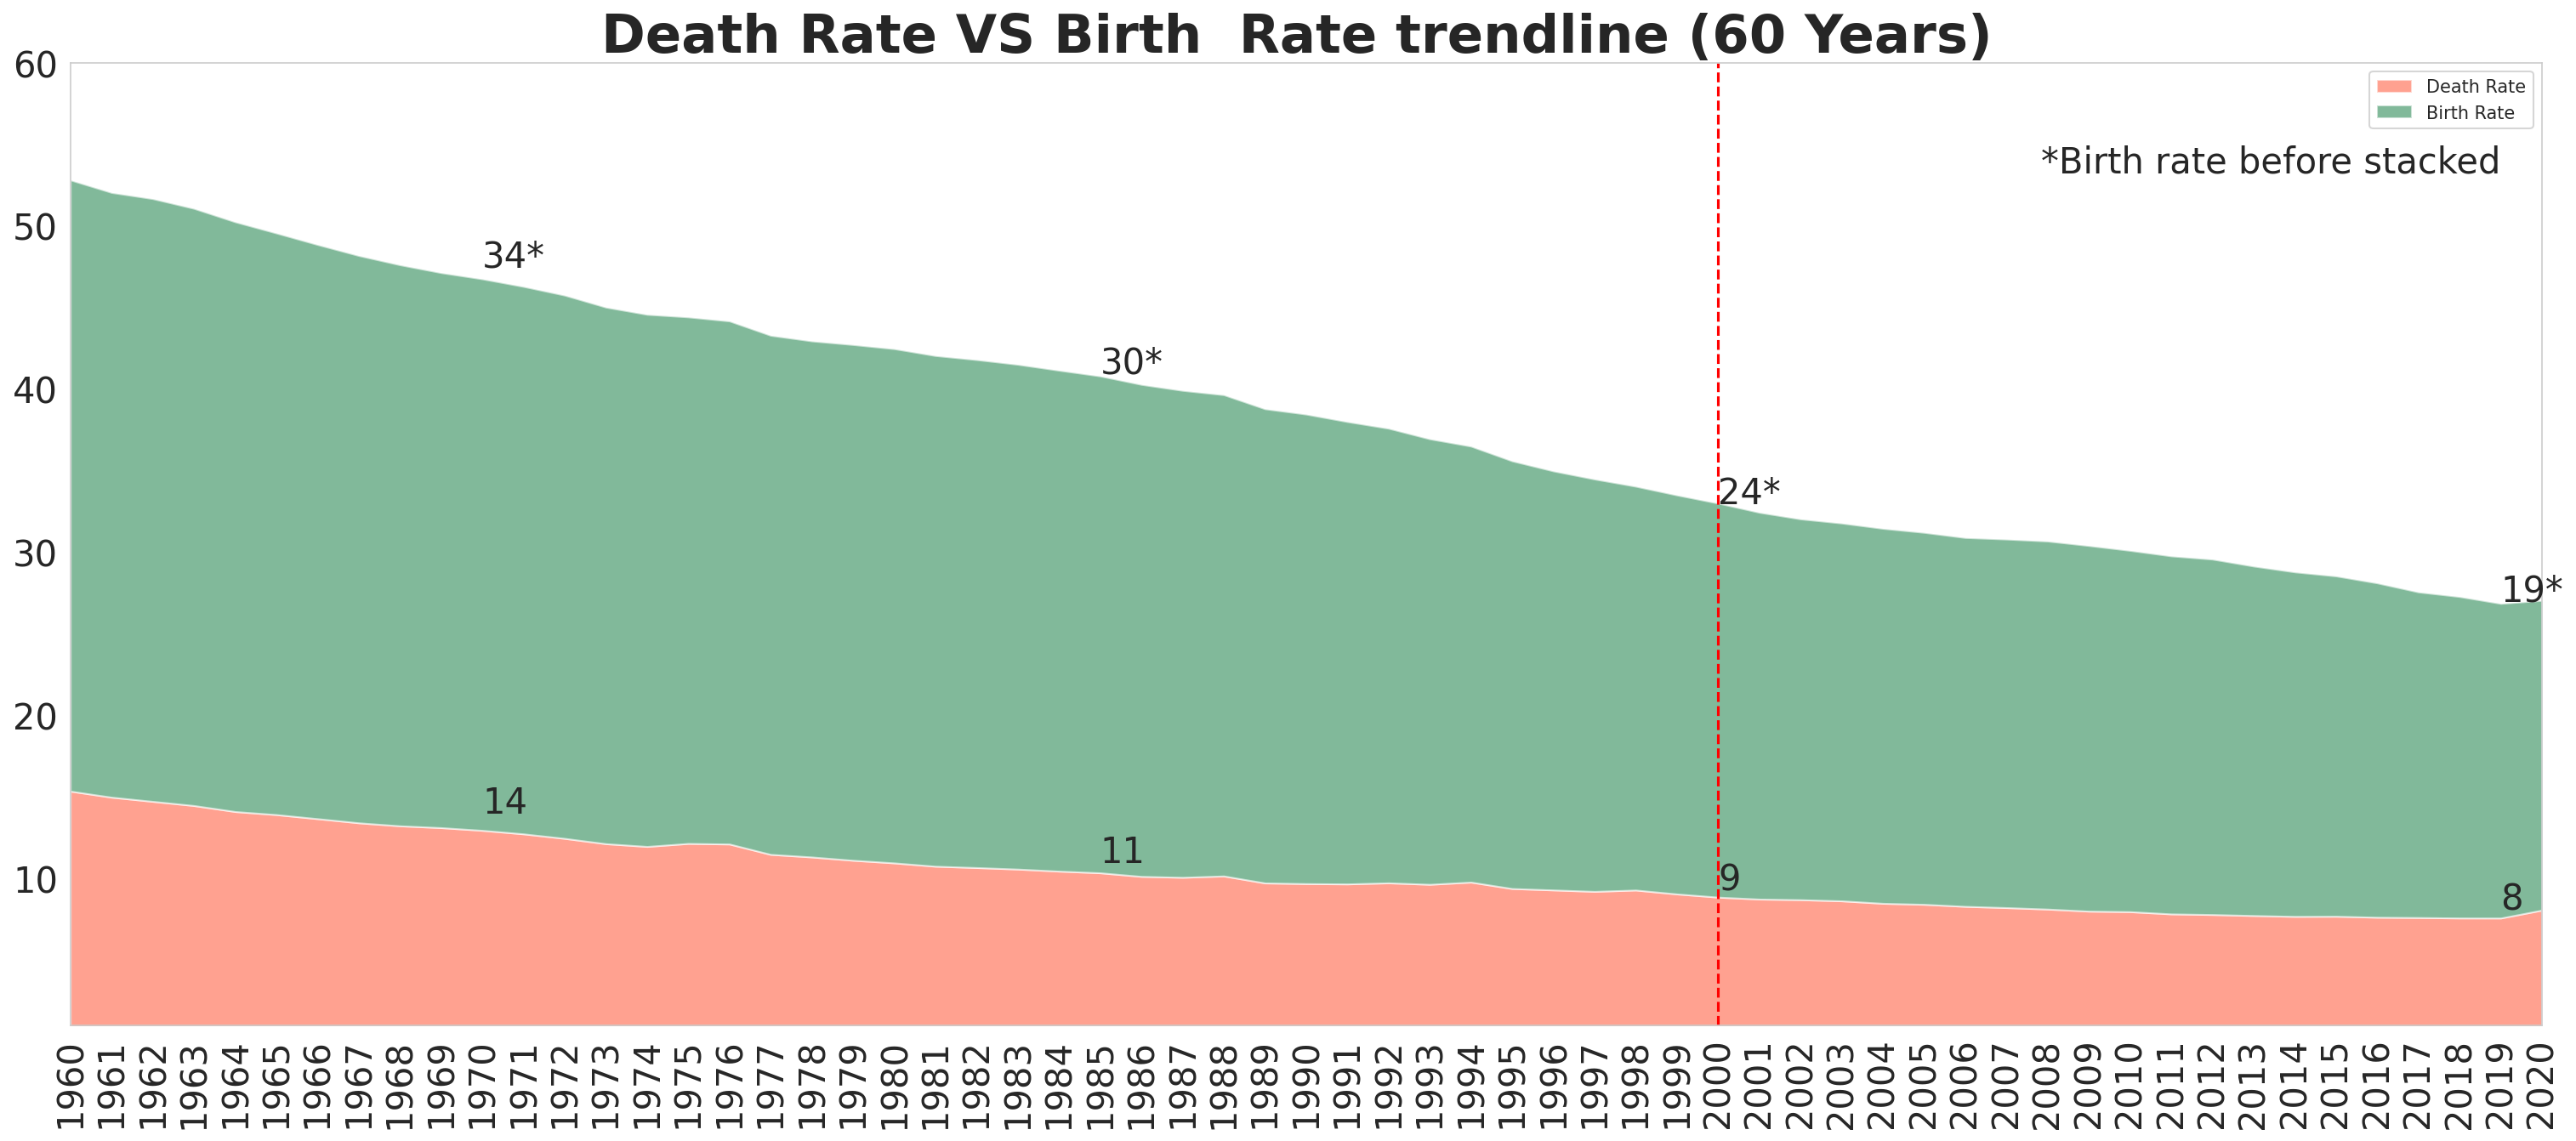

In [24]:
df_pivot13 = df.pivot_table(index='Year',columns=None,values=['Death Rate','Birth Rate'],aggfunc=['mean'])
type(df_pivot13)
xyear_asia = df_pivot13.index
d=df_pivot13.iloc[:,0] #  Deathrate
b=df_pivot13.iloc[:,1] # Brithrate

fig, ax = plt.subplots(figsize=(25,10),dpi=150)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.margins(0,0) 

pal = ["tomato", "seagreen",]
nal = ["alpha=0.5","alpha=0.70"]
plt.stackplot(xyear_asia,b,d, labels=['Death Rate','Birth Rate '], colors=pal, alpha=0.6)
plt.legend(loc='upper right')
plt.title("Death Rate VS Birth  Rate trendline (60 Years) ",fontsize = 30,fontweight="bold")
plt.ylim(1, 60)

ax.annotate("34*", xy=('1970', 37), xycoords='data', 
             xytext=('1970',47.5), textcoords='data',fontsize=20) 
ax.annotate("30*", xy=('1985', 31), xycoords='data', 
             xytext=('1985',41), textcoords='data',fontsize=20)
ax.annotate("24*", xy=('2000', 22), xycoords='data', 
             xytext=('2000',33), textcoords='data',fontsize=20)
ax.annotate("19*",  xy=('2020', 17), xycoords='data', 
             xytext=('2019',27), textcoords='data',fontsize=20)
ax.annotate("14",  xy=('1970', 11), xycoords='data', 
             xytext=('1970',14), textcoords='data',fontsize=20)
ax.annotate("11", xy=('1985', 10), xycoords='data', 
             xytext=('1985',11), textcoords='data',fontsize=20)
ax.annotate("9", xy=('2000', 8), xycoords='data', 
             xytext=('2000',9.3), textcoords='data',fontsize=20)
ax.annotate("8", xy=('2020', 7), xycoords='data', 
             xytext=('2019',8.1), textcoords='data',fontsize=20)
ax.annotate("*Birth rate before stacked", xy=('2020', 7), xycoords='data', 
             xytext=('2019',55), textcoords='data',ha='right',va='top',fontsize=20)
ax.axvline(x='2000', linestyle='--',color='red')

plt.savefig("Death Rate VS Birth Rate.png",dpi=150)

##3.5 Average Life Expectancy

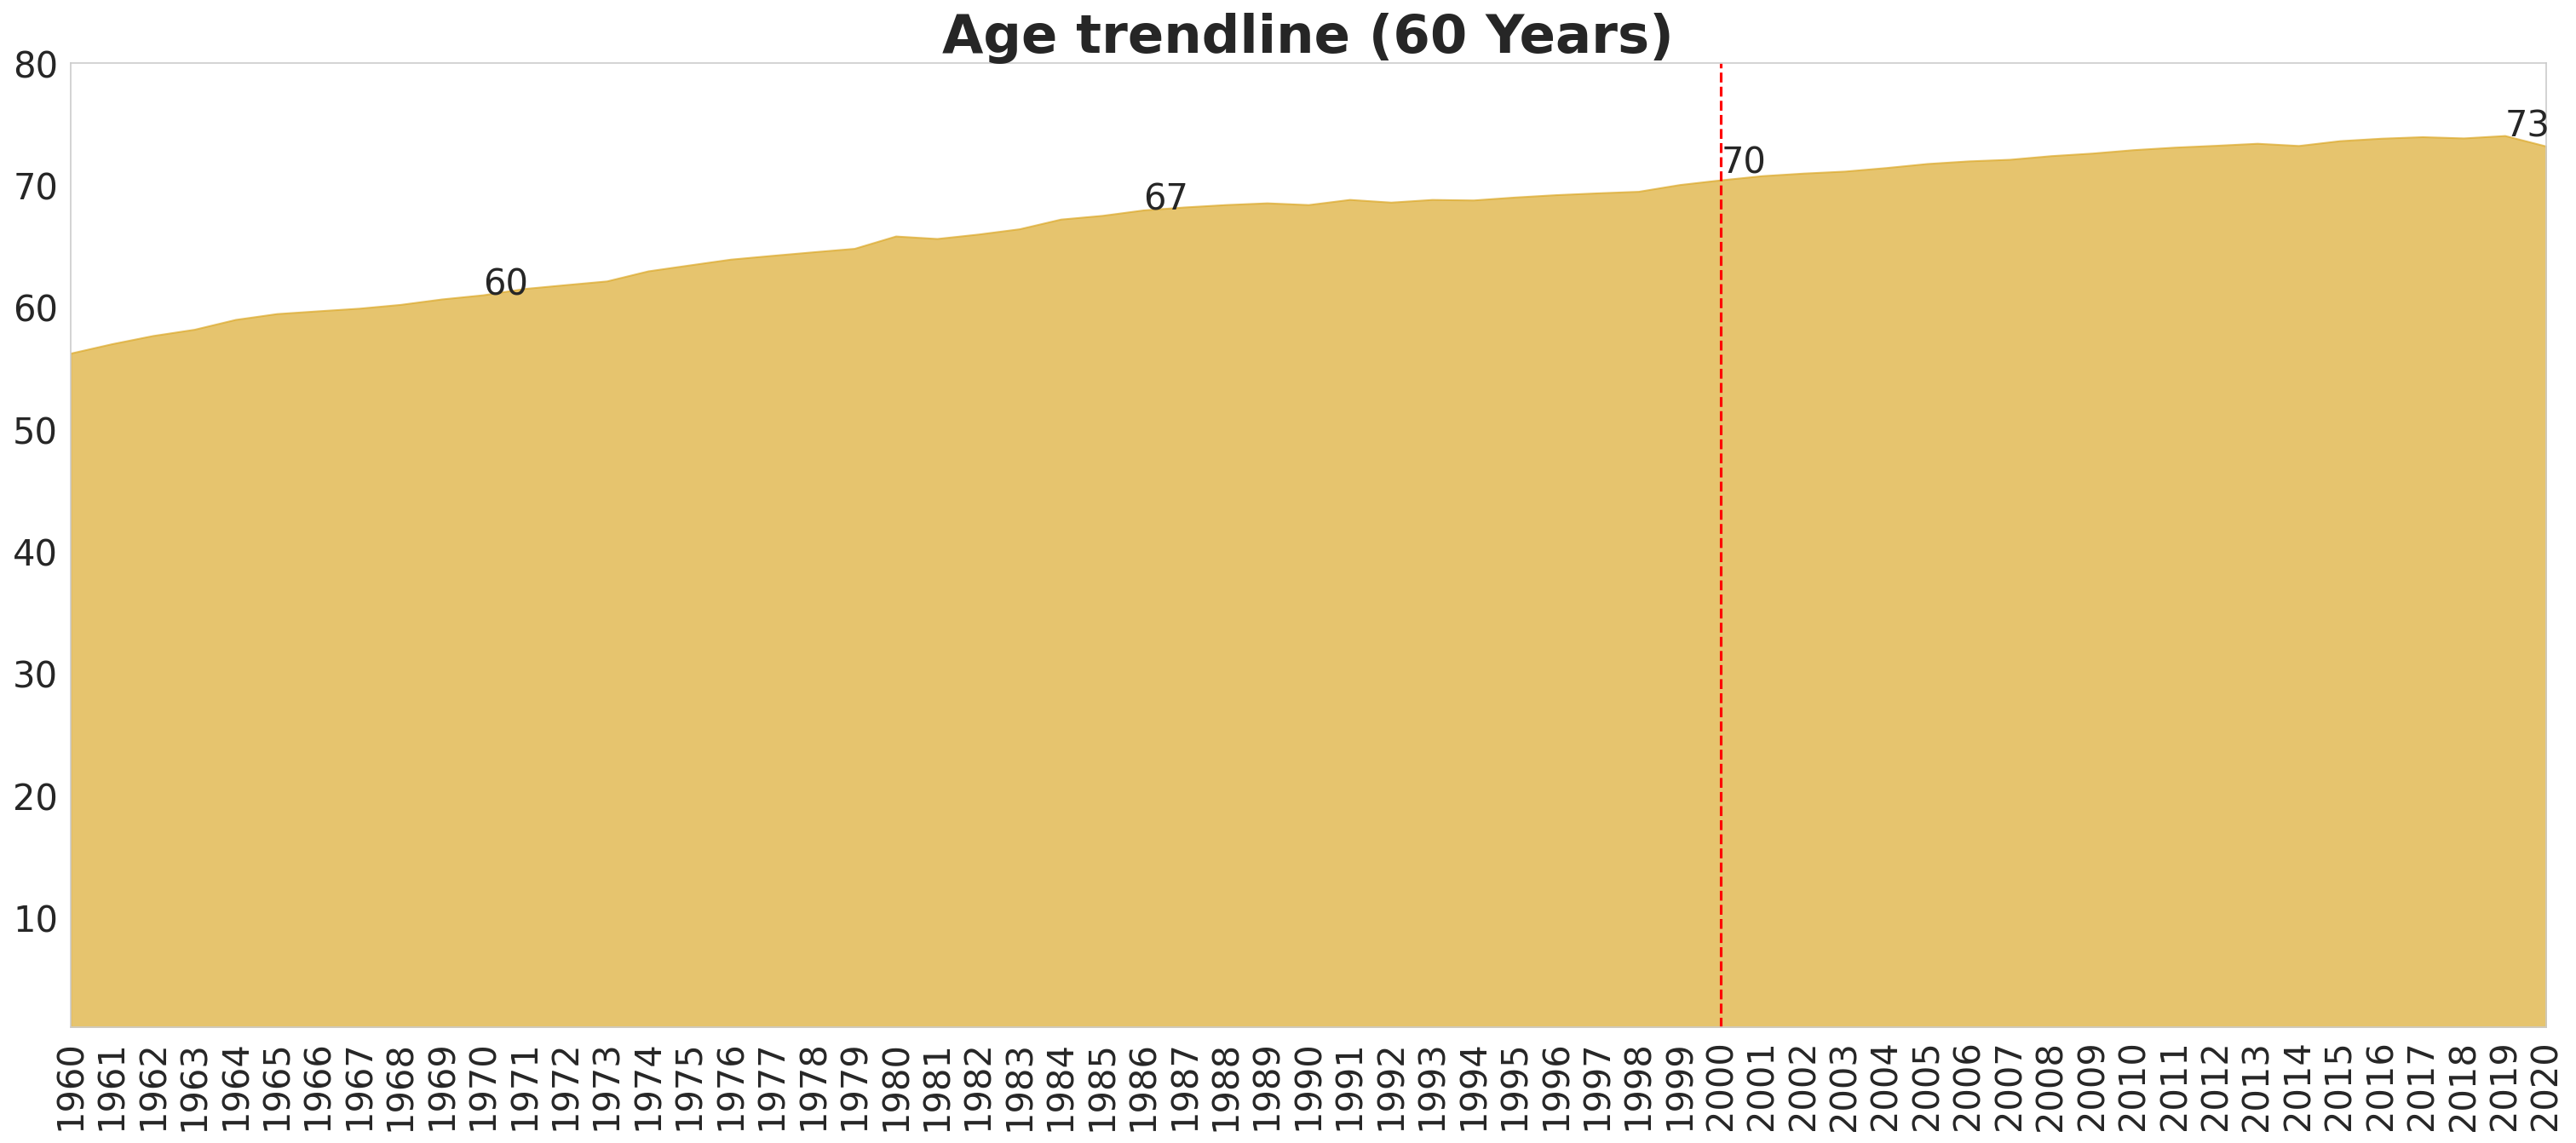

In [25]:
## ภาพรวม Life expectancy
btotal = df.pivot_table(index='Year',columns=None,values=['Life'],aggfunc=['median'])
type(btotal)
c=palette=sns.color_palette("cubehelix")
fig, ax = plt.subplots(figsize=(25,10),dpi=150)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)

tyear = btotal.index
btotal =btotal.iloc[:,0]
plt.fill_between(tyear,btotal,color='goldenrod',alpha=0.65)
plt.title("Age trendline (60 Years)",fontsize = 30,fontweight="bold")
plt.margins(0,0) 
plt.ylim(1, 80)


ax.annotate("60", xy=('1970', 37), xycoords='data', 
             xytext=('1970',61), textcoords='data',fontsize=20) 
ax.annotate("67", xy=('1986', 31), xycoords='data', 
             xytext=('1986',68), textcoords='data',fontsize=20)
ax.annotate("70", xy=('2000', 22), xycoords='data', 
             xytext=('2000',71), textcoords='data',fontsize=20)
ax.annotate("73",  xy=('2020', 17), xycoords='data', 
             xytext=('2019',74), textcoords='data',fontsize=20)
ax.axvline(x='2000', linestyle='--',color='red')

plt.savefig("Age Rate.png",dpi=150)

,Country Name,Birth Rate,Life
0,Cayman Islands,14.74,82.19
1,Liechtenstein,13.87,81.13
2,Bermuda,13.55,78.96
3,Faroe Islands,15.73,78.87
4,Iceland,17.67,78.18
5,Japan,12.12,78.01
6,Sweden,12.42,77.85
7,Switzerland,12.53,77.67
8,Norway,13.70,77.43
9,Curacao,12.57,77.42


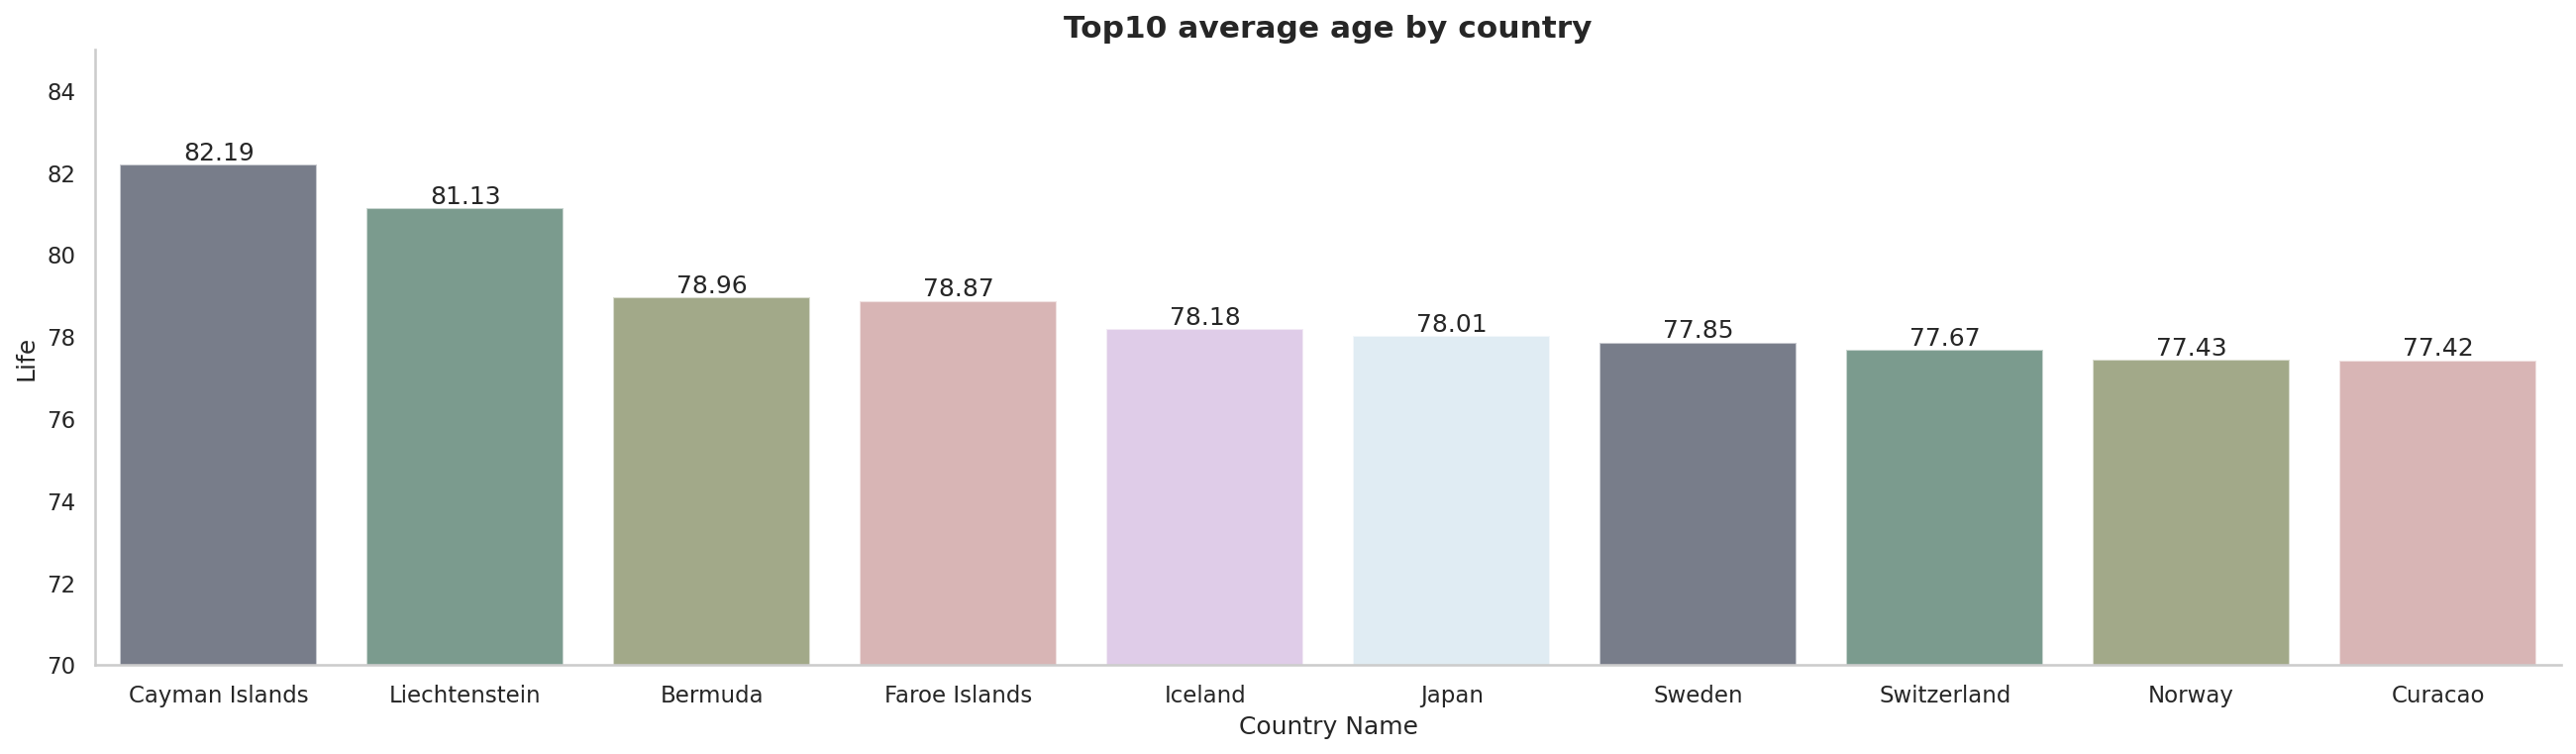

In [26]:
#ประเทศที่มีอายุยืน 10 อันดับแรก
df2=df.pivot_table(index='Country Name',columns=None,values=['Birth Rate','Life'],aggfunc='mean').sort_values('Life',ascending=False).reset_index()
df22 = df2.iloc[0:10].round(2)
sns.set(rc={'figure.dpi':150})

sns.set_style("whitegrid", {'axes.grid' : False})
g = sns.catplot( kind='bar',
             data=df22,
             x='Country Name',            
             y='Life',   
             height=5, aspect=3.5,
             alpha=0.6,palette=sns.color_palette("cubehelix"))

for ax in g.axes.ravel():
  for c in ax.containers:
    ax.bar_label(c, label_type='edge')
  ax.margins(y=0.2)

plt.ylim(70, 85)
plt.title("Top10 average age by country",fontsize=15,fontweight="bold")
plt.savefig("top avg age.png",dpi=150)
df22

,Country Name,Birth Rate,Life
0,South Sudan,48.07,38.84
1,Mali,47.90,45.12
2,Sierra Leone,44.13,45.16
3,Chad,48.66,45.38
4,Niger,53.39,45.75
5,Nigeria,44.24,45.86
6,Malawi,47.31,46.18
7,Timor-Leste,38.47,46.21
8,Angola,48.54,46.43
9,Mozambique,44.73,46.98


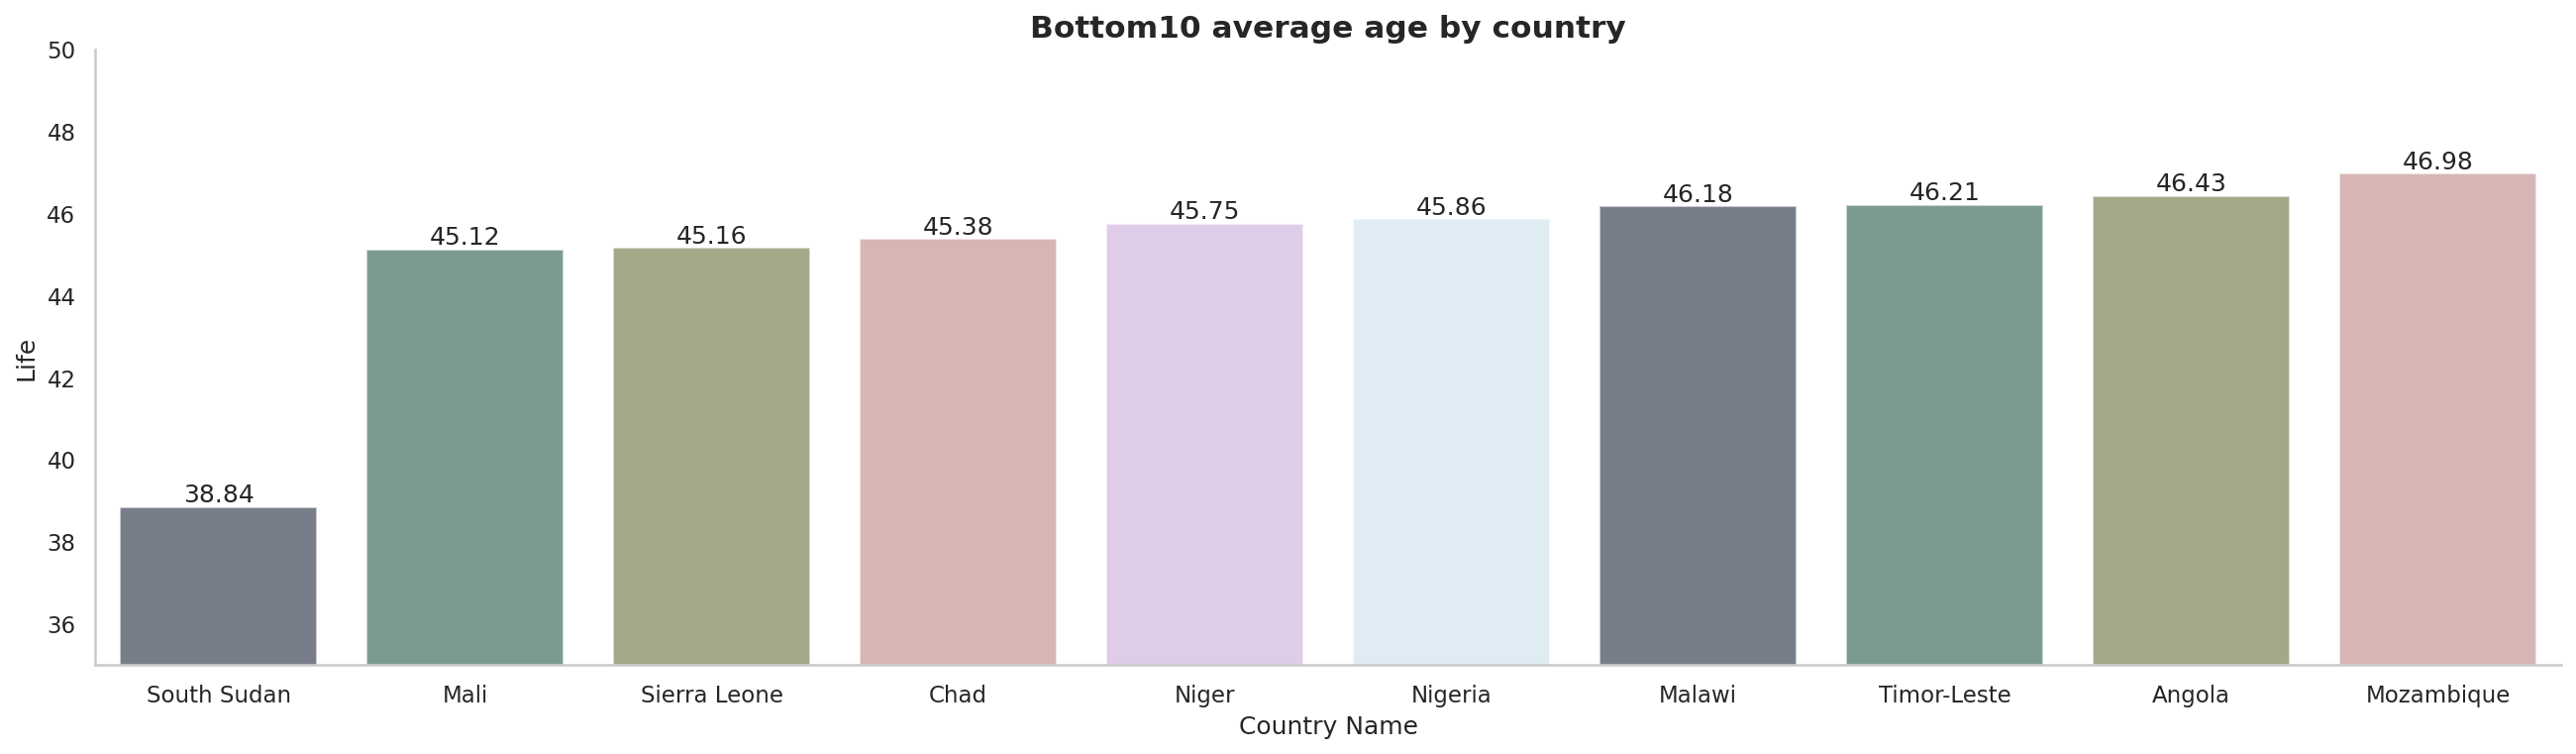

In [27]:
#ประเทศ 10 อันดับสุดท้าย 
df3=df.pivot_table(index='Country Name',columns=None,values=['Birth Rate','Life'],aggfunc='mean').sort_values('Life',ascending=True).reset_index()
df33 = df3.iloc[0:10].round(2)
sns.set(rc={'figure.dpi':150})

sns.set_style("whitegrid", {'axes.grid' : False})
g = sns.catplot( kind='bar',
             data=df33,
             x='Country Name',             # Axis to show the categories
             y='Life',     # Quantitative values
             height=5, aspect=3.5,
             alpha=0.6,palette=sns.color_palette("cubehelix"))

for ax in g.axes.ravel():
  for c in ax.containers:
    ax.bar_label(c, label_type='edge')
  ax.margins(y=0.2)

plt.ylim(35,50 )
plt.title("Bottom10 average age by country",fontsize=15,fontweight="bold")

plt.savefig("bottom avg age.png",dpi=150)
df33

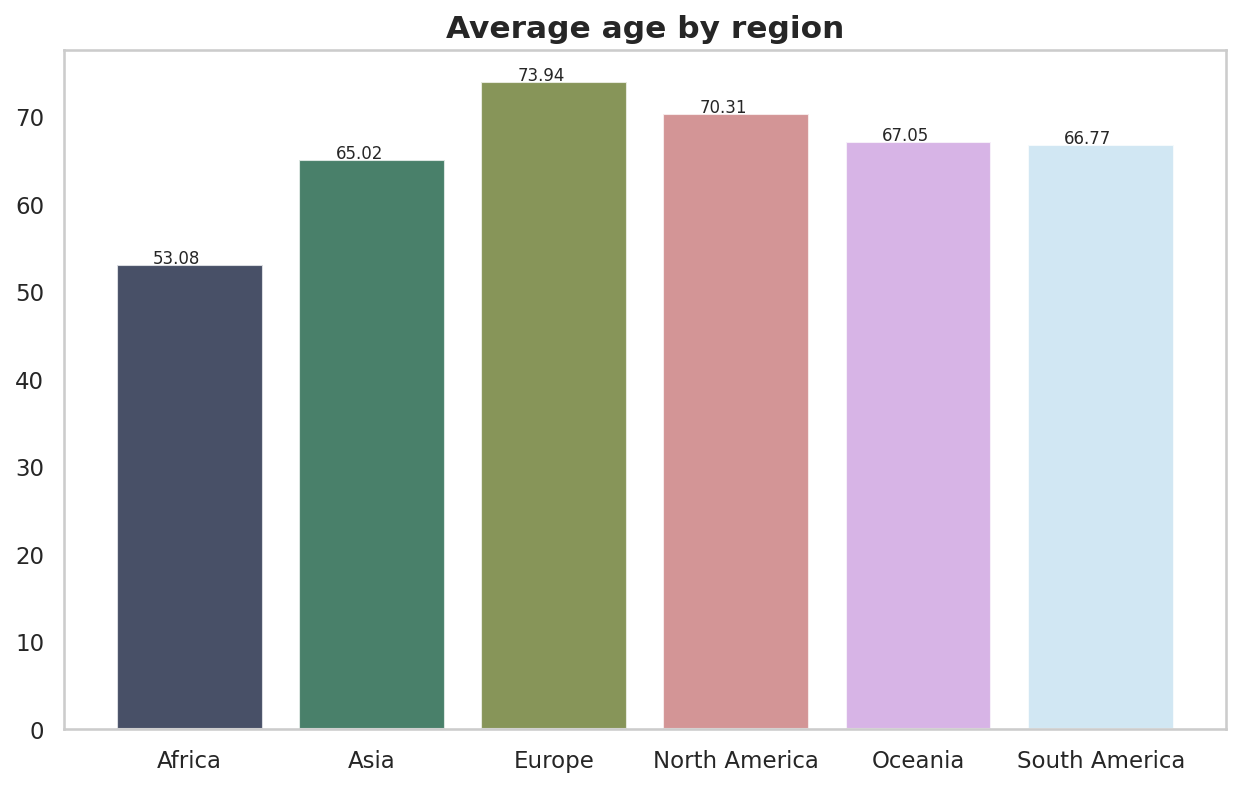

In [28]:
#Life expectancy by regions
df_pivot =df.pivot_table(index='Continent',columns=None,values=['Life'],aggfunc=['mean'])
type(df_pivot)
Continent= df_pivot.index
c=palette=sns.color_palette("cubehelix")
total_pop=df_pivot.iloc[:,0].round(2)

plt.figure(figsize=(10,6))
g=plt.bar(Continent,total_pop,color=c,alpha=0.8)

for bar in g:
    yval = bar.get_height()
    plt.text(bar.get_x()+.2, yval +.2, yval,fontsize=8)

plt.title("Average age by region",fontsize=15,fontweight="bold")
plt.savefig("Bar avg Age Rate by region.png",dpi=150)

##3.6 Gender proportion

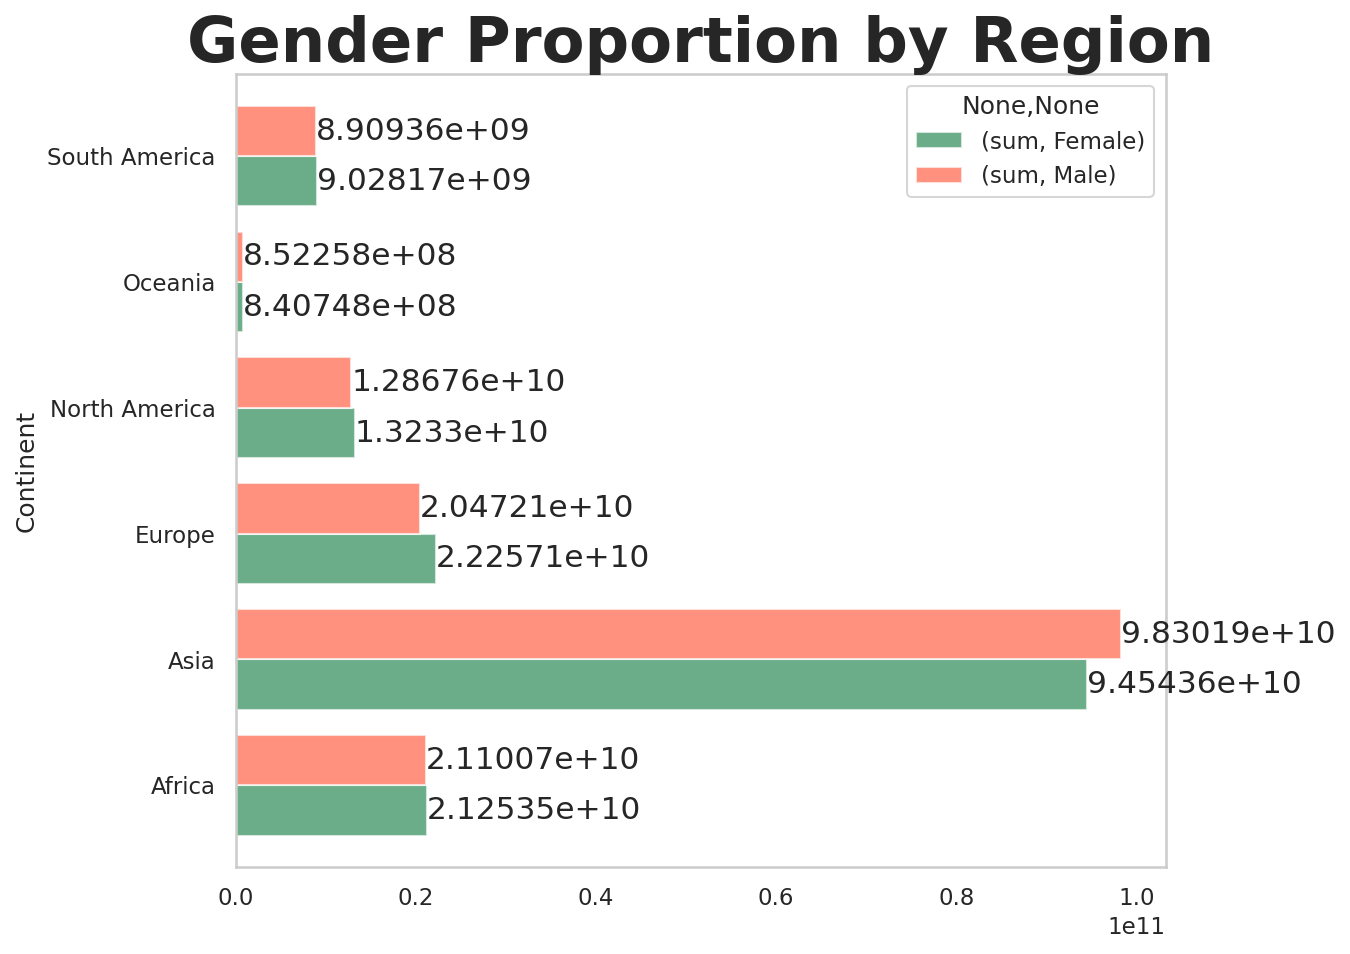

In [51]:
sex = df.pivot_table(index='Continent',columns=None,values=['Male','Female'],aggfunc=['sum'])
type(sex)
fig, ax = plt.subplots(figsize=(8,7))
pal = ["seagreen", "tomato",]
c=palette=sns.color_palette("cubehelix")
bars=sex.plot.barh(color=pal,title = "Proportion Gender by Region",alpha=0.7,width = 0.8,ax=ax)

for bars in ax.containers:
    ax.bar_label(bars,fontsize=15)
    
plt.title("Gender Proportion by Region",fontsize=30,fontweight="bold")
plt.savefig(" mf Bar agender Rate by region.png",dpi=150)

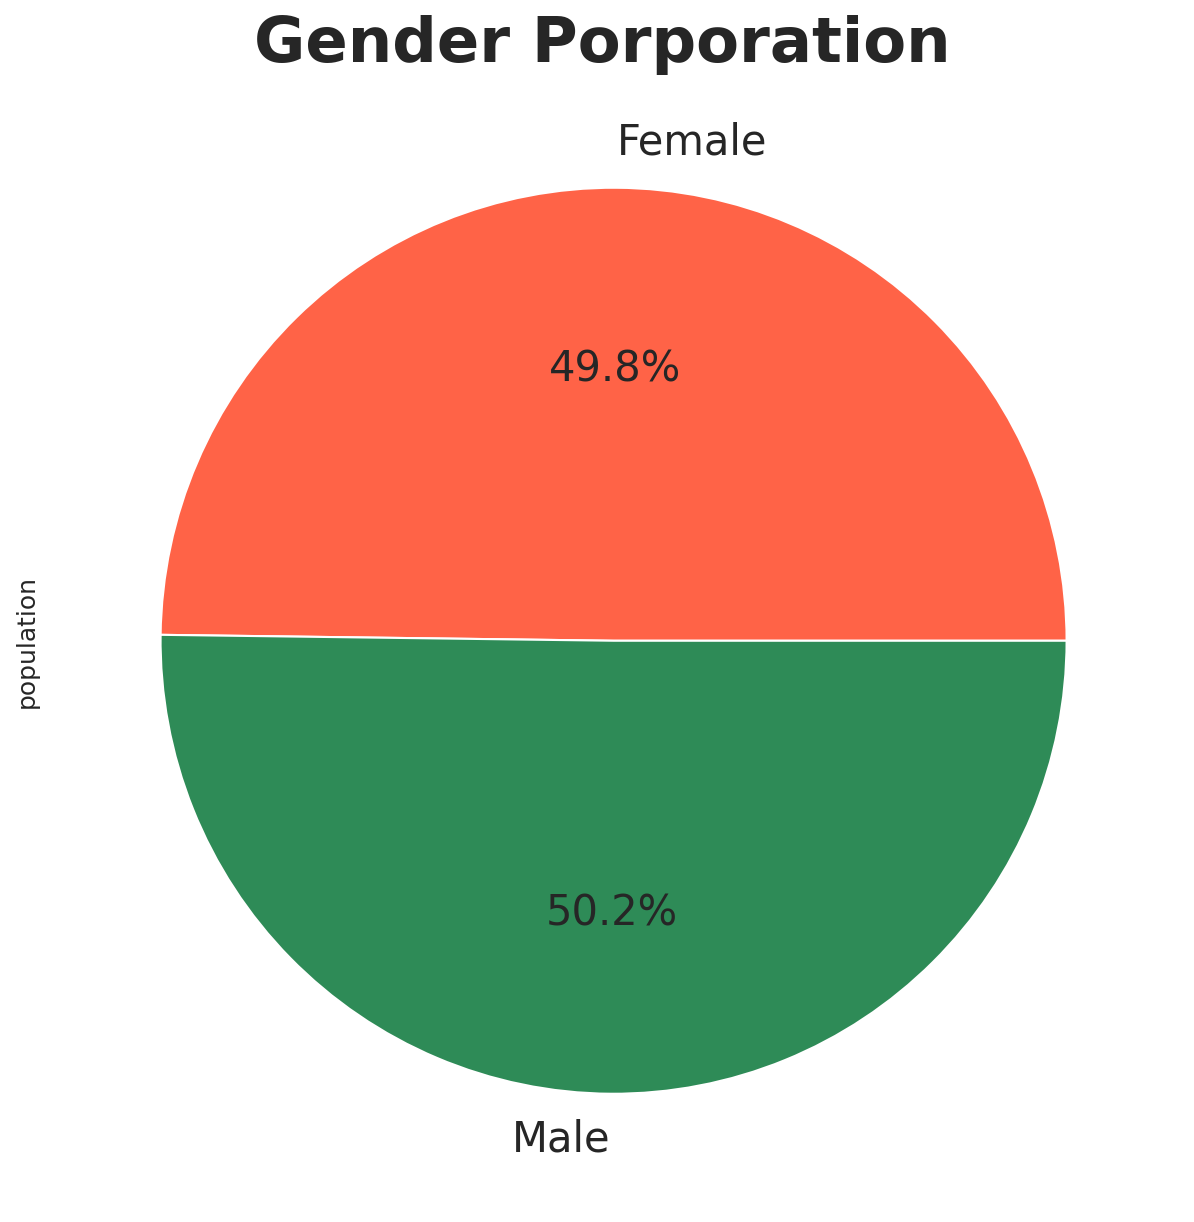

<Figure size 2250x1500 with 0 Axes>

<Figure size 900x600 with 0 Axes>

In [30]:

male =df['Male'].sum()
female = df['Female'].sum()


df4 = pd.DataFrame([['Male',male],['Female',female]],columns=('Gender', 'population'))
type(df4)
colors1 = ['tomato','seagreen']
plt.figure(figsize=(15, 10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
palette = {"Female":"tab:pink",
           "male":"tab:royalblue"}

data = df4.groupby("Gender")["population"].sum()
data.plot.pie(autopct="%.1f%%",colors=colors1,fontsize=20)
plt.title("Gender Porporation ",fontsize=30,fontweight="bold")
plt.figure(figsize=(15, 10))
plt.show()
plt.savefig("Pie Gender.png",dpi=150)

##3.7 Scatter plot

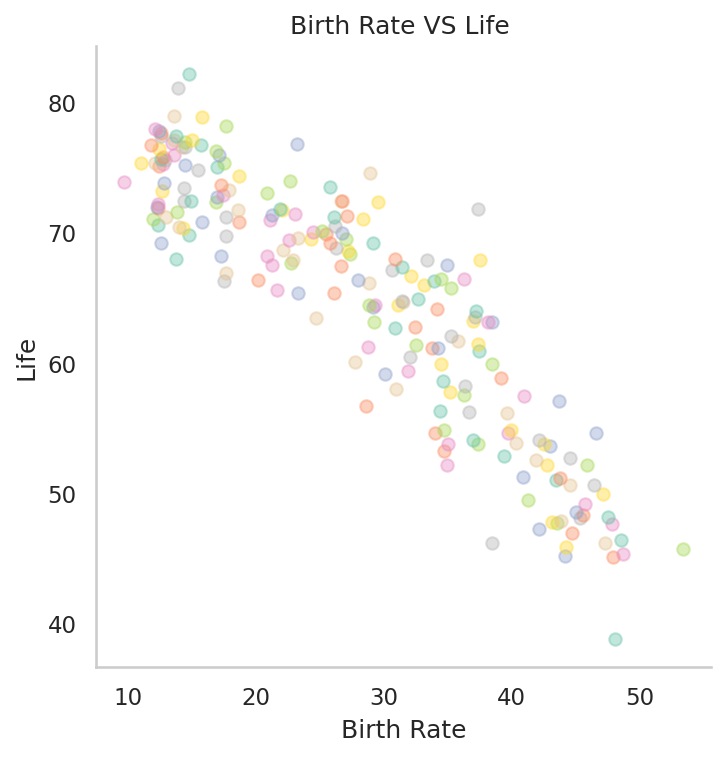

In [31]:
df33=df.pivot_table(index='Country Name',columns=None,values=['Birth Rate','Death Rate','Life'],aggfunc='mean').sort_values('Life',ascending=True).reset_index()
sns.lmplot( data=df33,
            x='Birth Rate', y='Life',
            hue='Country Name',
            markers="o",  
            palette="Set2",       
            scatter_kws=dict(alpha=0.4),  
            line_kws=dict(alpha=0.6),     
            legend=False
        ).set(title='Birth Rate VS Life ')
plt.savefig("birth vs Life.png",dpi=150)

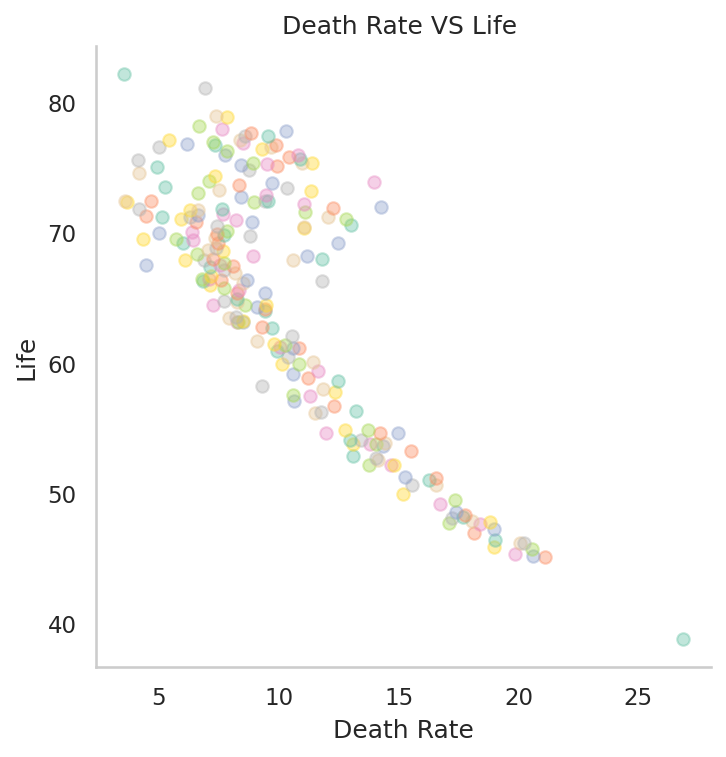

In [32]:
df33=df.pivot_table(index='Country Name',columns=None,values=['Birth Rate','Death Rate','Life'],aggfunc='mean').sort_values('Life',ascending=True).reset_index()
sns.lmplot( data=df33,
            x='Death Rate', y='Life',
            hue='Country Name',
            markers="o",   # Set markers for each hue color
            palette="Set2",       # Colors to use for the different levels of the hue variable
            scatter_kws=dict(alpha=0.4),  # Set the scatter plot
            line_kws=dict(alpha=0.6),     # Set the regression line
            legend=False
        ).set(title='Death Rate VS Life ')
plt.savefig("death vs Life.png",dpi=150)

##3.8 Animated_graph

In [33]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from plotly import tools
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from plotly.subplots import make_subplots

In [34]:
def animated_graph(df,column_name):
  
  fig=px.choropleth(df.sort_values('Year'),locations='Country Name',color='Life',
                    locationmode='country names',
                    animation_frame='Year',
                    color_continuous_midpoint=0.8,
                      color_continuous_scale= px.colors.sequential.RdBu,
                        width=1500,height=600)
  fig.update_layout(title='Comparing Life Expectancy Country',autosize=True)
  color_continuous_scale=[[0, 'red'], [0.5, 'yellow'], [1, 'blue']]
  fig.show()

animated_graph(df,'Life expectancy by country')
plt.savefig("animated_graph.png",dpi=150)

<Figure size 900x600 with 0 Axes>